In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def plot_series(time, series, line="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], line, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [4]:
# add trend common patterns
def trend(time, slope=0):
    return slope * time

In [5]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = baseline + trend(time, 0.1)

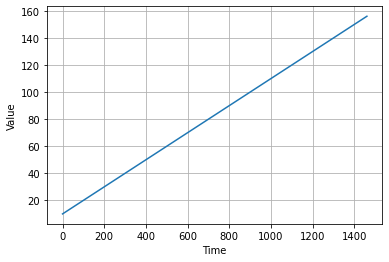

In [6]:
plot_series(time, series)

In [9]:
# seasonality
def seasonal_pattern(season_time):
    return np.where(season_time < 0.4, np.cos(season_time * 2 * np.pi),
                   1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

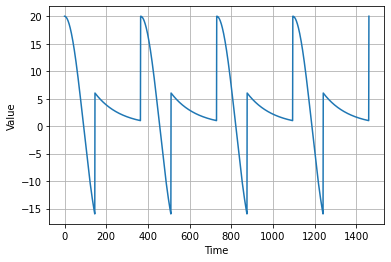

In [12]:
season_series = seasonality(time, period=365, amplitude=20)
plot_series(time, season_series)

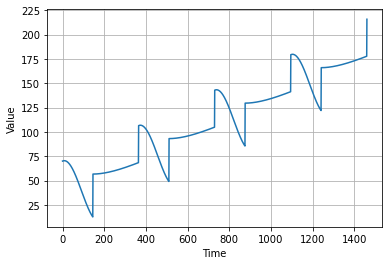

In [14]:
# time series with both trend and seasonality
slope = 0.05
series = baseline + series + season_series

plot_series(time, series)

In [17]:
# noise
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

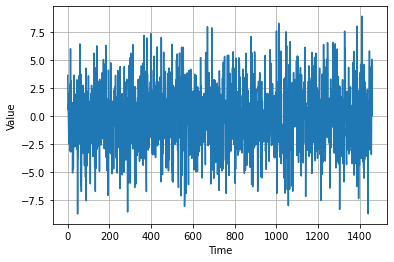

In [18]:
noise = white_noise(time, noise_level=3, seed=20902490)

plot_series(time, noise)

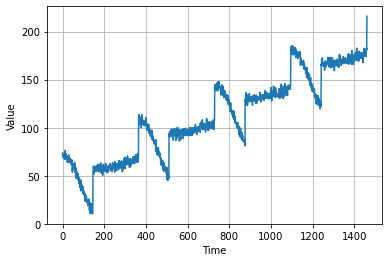

In [19]:
# series with seasonality, noise, trend
series += noise
plot_series(time, series)